In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from import_fun import mLCE_jit, LCE_jit

In [2]:
x0 = np.array([0., 0.])
t0 = 0.
dt = 1e-2
T_init = int(1e5)
T_cal = int(1e6)

In [3]:
# 模型表达式
@njit
def f(x, t, A):
    # 常量参数
    ξ = 0.175 
    a = 0.7 
    b = 0.8
    c = 0.1
    ω = 1
    res = np.zeros_like(x)
    res[0] = x[0]*(1-ξ) - np.power(x[0],3)/3 - x[1] + A*np.cos(ω*t)
    res[1] = c*(x[0]+a-b*x[1])
    
    return res


# 雅可比矩阵
@njit
def jac(x, t, A):
    # 常量参数
    ξ = 0.175 
    a = 0.7 
    b = 0.8
    c = 0.1
    ω = 1
    res = np.zeros((x.shape[0], x.shape[0]))
    res[0, 0], res[0, 1] = (1-ξ)-x[0]*x[0], -1
    res[1, 0], res[1, 1] = c, -c*b
    
    return res

In [4]:
A = 0.85
LCE1 = LCE_jit(x0, f, jac, T_init, T_cal, dt, None, A)

In [5]:
print(LCE1)

[ 0.03734241 -0.41972657]


# 关于振幅的李指数分岔图

In [6]:
x0 = np.array([0., 0.])
t0 = 0.
dt = 1e-2
T_init = int(1e5)
T_cal = int(1e6)

A_list = np.arange(0., 1.6, 0.05)

In [7]:
@njit(parallel=True)
def parallel_LCE(A_list, x0, f, jac, T_init, T_cal, dt):
    n1 = len(A_list)
    m = len(x0)
    le = np.zeros((n1, m))
    for i in prange(n1):
        A = A_list[i]
        le[i, :] = LCE_jit(x0, f, jac, T_init, T_cal, dt, None, A)

    return le


In [8]:
plt_LCE = parallel_LCE(A_list, x0, f, jac, T_init, T_cal, dt)

In [ ]:
# print(plt_LCE)

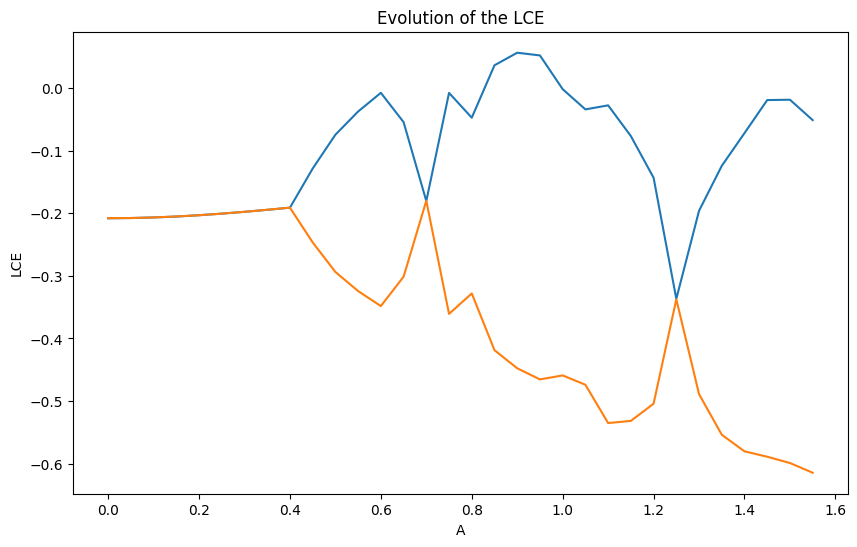

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(A_list[:len(plt_LCE)], plt_LCE)
plt.xlabel("A")
plt.ylabel("LCE")
plt.title("Evolution of the LCE")
plt.show()

# 关于振幅的最大李指数分岔图

In [10]:
@njit(parallel=True)
def parallel_LCE(A_list, x0, f, jac, T_init, T_cal, dt):
    n1 = len(A_list)
    le = np.zeros(n1)
    for i in prange(n1):
        A = A_list[i]
        le[i] = mLCE_jit(x0, f, jac, T_init, T_cal, dt, A)

    return le

In [11]:
plt_mLCE = parallel_LCE(A_list, x0, f, jac, T_init, T_cal, dt)

In [12]:
print(plt_mLCE)

[-0.20796705 -0.20770932 -0.20673258 -0.20521772 -0.20317408 -0.20064203
 -0.19779018 -0.19455753 -0.19106054 -0.12869785 -0.07459938 -0.03754867
 -0.0077144  -0.05454568 -0.18002629 -0.00776954 -0.04746385  0.03600389
  0.05630621  0.05208454 -0.00183895 -0.03412965 -0.02766027 -0.07674062
 -0.14332068 -0.33668992 -0.1961564  -0.12436089 -0.07206843 -0.01937182
 -0.01874883 -0.05131425]


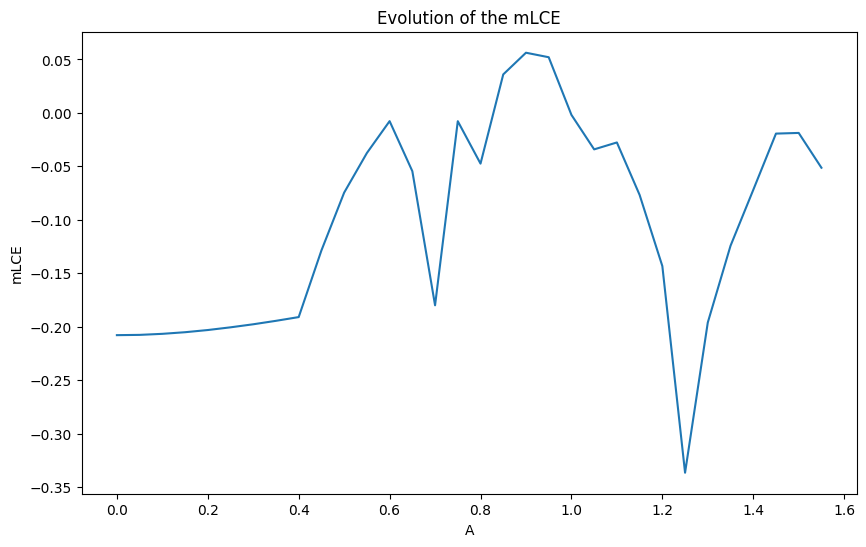

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(A_list[:len(plt_mLCE)], plt_mLCE)
plt.xlabel("A")
plt.ylabel("mLCE")
plt.title("Evolution of the mLCE")
plt.show()